### Clermoont Project - v0.1.0

***
Kaggle Repository: <a href= "https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery"> Ships in Satellite Imagery</a>
***

#### Appendant

In [3]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import os
import json
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation

#### Data

In [2]:
shipclass = pd.read_json("data/shipsnet.json")
shipclass.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


#### Processing

In [3]:
shipclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [4]:
len(shipclass["data"].iloc[0])

19200

In [5]:
shipclass.shape

(4000, 4)

In [6]:
shipclass["labels"].value_counts()

0    3000
1    1000
Name: labels, dtype: int64

In [7]:
x = np.concatenate(shipclass["data"].values)

print(f"Min RGB value: {min(x)}.")
print(f"Max RGB value: {max(x)}.")
print(f"NaN values: {np.isnan(x).sum()}.")

Min RGB value: 1.
Max RGB value: 255.
NaN values: 0.


In [8]:
# Normaliza os dados
shipclass["normalised_data"] = shipclass["data"].apply(lambda x: np.array(x) / 255)

In [9]:
# Reorganizando data

shipclass["reshaped_data"] = shipclass["normalised_data"].apply(lambda x: x.reshape([3, 80, 80]).transpose([1, 2, 0]))

In [10]:
shipclass["reshaped_data"]

0       [[[0.3215686274509804, 0.3686274509803922, 0.3...
1       [[[0.2980392156862745, 0.33725490196078434, 0....
2       [[[0.49019607843137253, 0.5333333333333333, 0....
3       [[[0.4, 0.4117647058823529, 0.3411764705882353...
4       [[[0.3058823529411765, 0.3215686274509804, 0.2...
                              ...                        
3995    [[[0.49411764705882355, 0.403921568627451, 0.3...
3996    [[[0.5098039215686274, 0.47843137254901963, 0....
3997    [[[0.6705882352941176, 0.6823529411764706, 0.6...
3998    [[[0.3333333333333333, 0.3607843137254902, 0.3...
3999    [[[0.47843137254901963, 0.40784313725490196, 0...
Name: reshaped_data, Length: 4000, dtype: object

In [28]:
shipclass = shipclass[["reshaped_data", "labels"]]
shipclass.head()

,reshaped_data,labels
0,"[[[0.3215686274509804, 0.3686274509803922, 0.3...",1
1,"[[[0.2980392156862745, 0.33725490196078434, 0....",1
2,"[[[0.49019607843137253, 0.5333333333333333, 0....",1
3,"[[[0.4, 0.4117647058823529, 0.3411764705882353...",1
4,"[[[0.3058823529411765, 0.3215686274509804, 0.2...",1


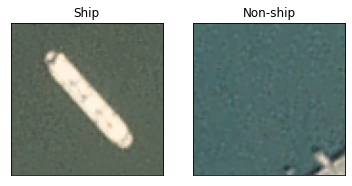

In [44]:
# Plotando imagens 

plt.subplot(121)
plt.title("Ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipclass["reshaped_data"][0])

plt.subplot(122)
plt.title("Non-ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipclass["reshaped_data"][1000])

plt.show()


In [47]:
# Separando data em x e y

X = shipclass["reshaped_data"]
y = shipclass["labels"]

In [48]:
# Treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)

X_train shape (2800,)
X_test shape (1200,)


In [51]:
# Convertendo numpy array para o tipo float para o Keras

X_train = np.array(X_train.tolist()).astype(float)
X_test = np.array(X_test.tolist()).astype(float)
y_train = np.array(y_train.tolist()).astype(float)
y_test = np.array(y_test.tolist()).astype(float)

In [53]:
# Incializando modelo de Deep Learning

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


2022-05-25 11:16:43.308678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 11:16:43.308732: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 11:16:43.308804: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LUCA): /proc/driver/nvidia/version does not exist
2022-05-25 11:16:43.310482: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


***

In [13]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn